### 課題<br>
・Kaggle:PlayGroundより『アワビの年齢当て』<br>
・期間2024.4.1-4.30

---

### ライブラリ

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

---

### データの確認

In [129]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [130]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


<u>カラム名、アワビの生態</u><br>
**Sex**:性別<br>
アワビの肝が肥大化する夏・秋に限り性別が分かる。肝（生殖腺）から、白色がオス、緑色がメスとなる。<br>
  M:male オス　F:Female メス　I:Infant 稚貝<br>
**Length**:長さ、**Diameter**:直径はどう違うのか不明。<br>
**Height**:厚み？<br>
**Whole weight**:全体重量。**whole weight1**・**whole weight2**・**Shell weight**:殻重量はその内訳か。<br>
**Rings**:年輪【本日のターゲット】<br>
アワビの年齢形質（年齢が読み取れる部位）は殻の表面にできる輪紋で、1年に1本産卵期にできると言われている。<br>
アワビの寿命は15~20年と言われている。長い個体だと30年生きることもある。

In [131]:
#データ数、欠損値、Dtypeの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


90615行、10列のデータ数。<br>
欠損値なしのため欠損値処理なし。<br>
Sexがobject型以外はint型、float型。

In [132]:
#統計情報
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


---

### 特徴量エンジニアリング

Sexがobject型なので数値型に変換したい。

In [133]:
#Sexの値をoject型からint型に変更したい。
def transform_df(df):
    df['Sex'] = df['Sex'].map({'I': 0, 'M': 1, 'F': 2}) 
    return df

df_train = transform_df(df_train)
df_test = transform_df(df_test)


In [134]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,2,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,2,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,1,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [135]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,1,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,1,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,1,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,0,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


---

### 可視化

In [150]:
import pandas_profiling
df_train.profile_report()

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [ ]:
column_names = df_train.columns.tolist()
column_names

['id',
 'Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight',
 'Rings']

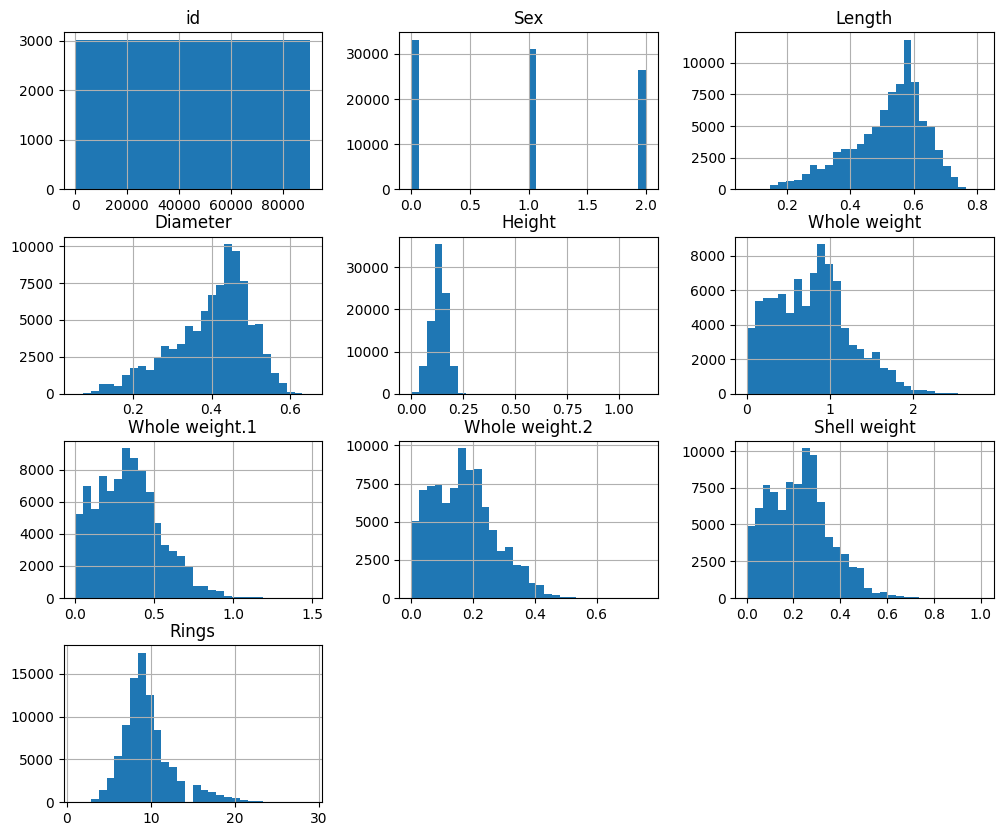

In [ ]:
df_train.hist(bins=30, figsize=(12, 10))
plt.show()

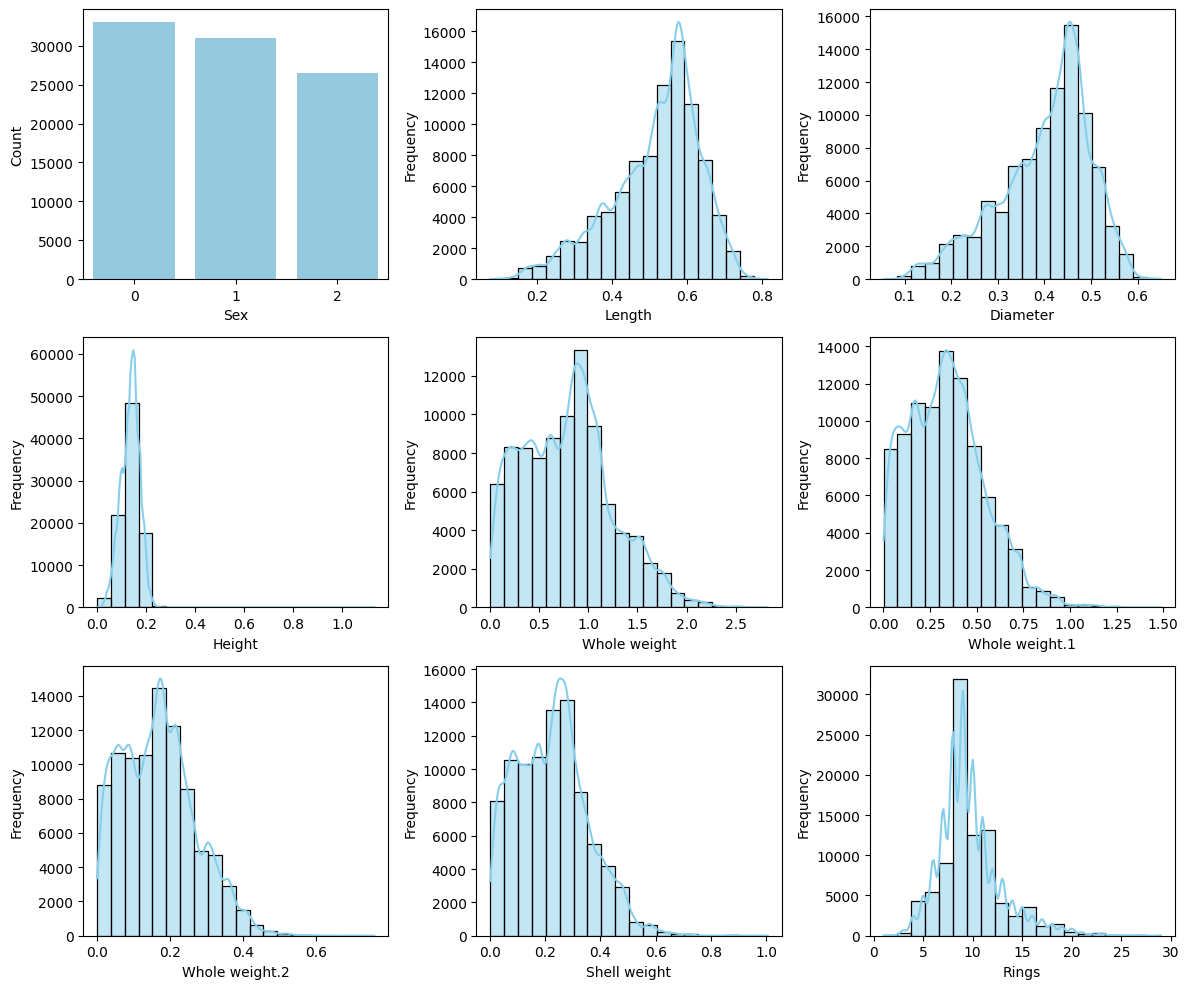

In [ ]:
# 数値列のみを抽出
numerical_columns = [
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Whole weight.1',
    'Whole weight.2',
    'Shell weight',
    'Rings'
]

# カテゴリカルな列を抽出
categorical_column = 'Sex'

# カテゴリカルな列のヒストグラムを描画する
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
sns.countplot(data=df_train, x=categorical_column, color='skyblue')
plt.xlabel(categorical_column)
plt.ylabel('Count')

# 数値列のヒストグラムを描画する
for i, column in enumerate(numerical_columns, 2):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[column], bins=20, kde=True, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: xlabel='Height'>

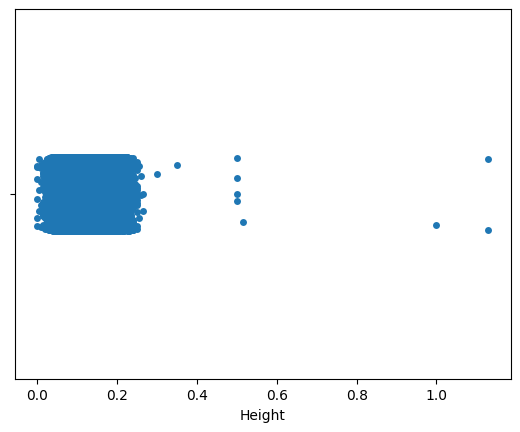

In [ ]:
sns.stripplot(x='Height', data=df_train)

In [ ]:
df_train.query('Height >= 0.4')

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
16384,16384,2,0.515,0.375,1.130,0.5720,0.2370,0.1455,0.1500,8
28651,28651,2,0.665,0.515,0.500,1.7825,0.5330,0.3340,0.4285,10
55852,55852,1,0.745,0.545,0.500,1.7875,0.8075,0.3935,0.5650,10
56089,56089,2,0.705,0.575,0.515,2.2100,1.1075,0.4865,0.5120,11
58048,58048,2,0.635,0.495,0.500,1.2615,0.5385,0.3050,0.3750,11
63851,63851,1,0.640,0.510,0.500,1.3715,0.5065,0.3050,0.4700,12
65464,65464,1,0.585,0.450,1.130,1.1000,0.5085,0.2425,0.2800,10
77326,77326,2,0.565,0.455,1.000,1.0145,0.5255,0.2440,0.2835,8


Heightが大きいというのは、縦長に育った可能性がある。<br>
外れ値と見なさずそのまま残す。

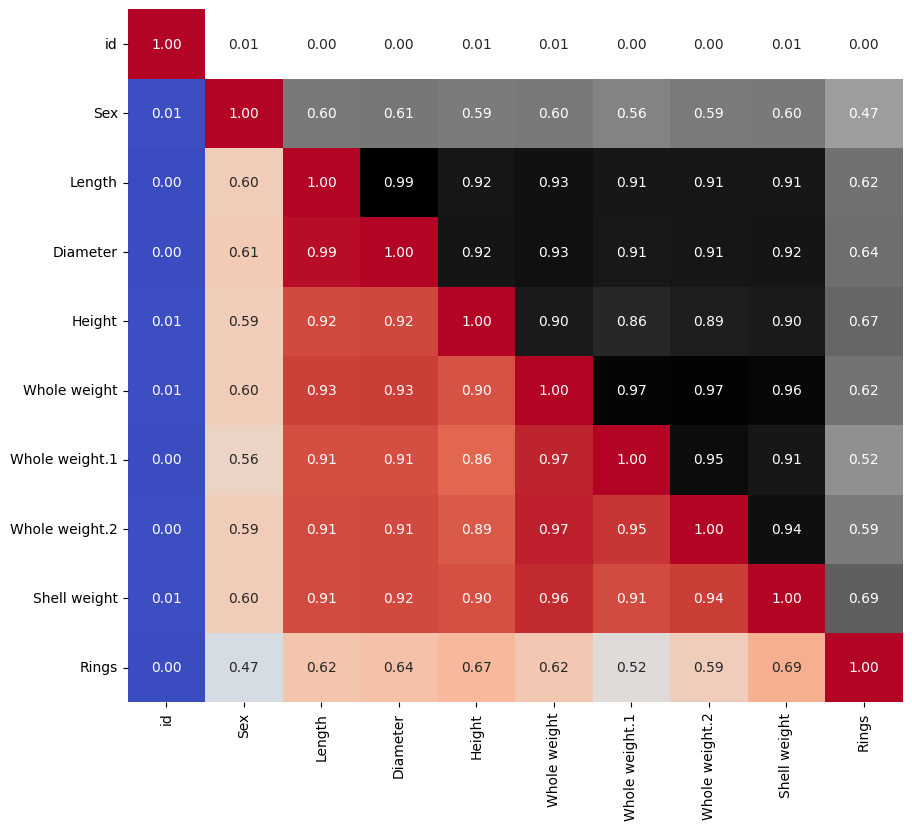

In [ ]:
soukan = df_train.corr()

n = soukan.shape[0]
mask = np.triu(np.ones((n, n), dtype=bool), k=1)

plt.figure(figsize=(10, 9))
sns.heatmap(soukan, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=False)
sns.heatmap(soukan, annot=True, cmap='Greys', fmt=".2f", mask=~mask, cbar=False)
plt.show()

Diameter、Lengthの相関係数は正の相関が強い。<br>
⇒両方ともその他との相関係数は高めで似通っている。lengthのみ使用していく。<br>
Whole weightとwholeweight.1、.2も正の相関が強く出ている。<br>
.1、.2、shellweightを足し合わせたものがwholeweigtのような感じがする。<br>
⇒wholeerightを除去してみる。


In [ ]:
#多重共線性がどうこうなっているかと思ったが、以下ドロップするとScoreが下がったためなかったことにする。
'''
df_train = df_train.drop(columns=['Diameter', 'Whole weight'])
'''


"\ndf_train = df_train.drop(columns=['Diameter', 'Whole weight'])\n"

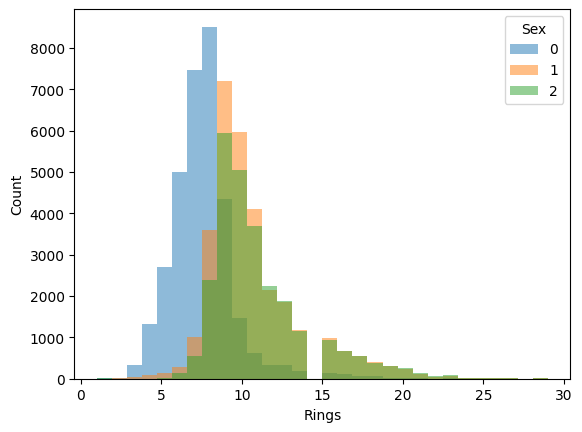

In [137]:
#RingsとSexとの関係
plt.hist(df_train.loc[df_train['Sex'] == 0, 'Rings'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(df_train.loc[df_train['Sex'] == 1, 'Rings'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.hist(df_train.loc[df_train['Sex'] == 2, 'Rings'].dropna(),
         bins=30, alpha=0.5, label='2')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.legend(title='Sex')

?14が欠けているのはなぜだろう。<br>
稚貝は年輪が少なく、雄雌はだいたい同じくらいか。

---

### 予測モデルの学習

In [138]:
#説明変数X（Rings以外)と目的変数(Rings)に分ける。
X = df_train.drop(columns=['id', 'Rings']).to_numpy()
y = df_train['Rings'].to_numpy()

In [139]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

def objective(trial, X_train, y_train, X_test, y_test):
    # LGBMRegressor に最適化するパラメータを定義する
    param = {
        "objective": "regression",
        "metric": "None",  # デフォルトのメトリクスを無効にする
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 14),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

    # 提案されたパラメータを使用して LGBMRegressor のインスタンスを作成します
    lgbm_regressor = LGBMRegressor(**param)
    
    # トレーニングデータにリグレッサーを当てはめる
    lgbm_regressor.fit(X_train, y_train)

    # テストデータから予測する
    y_pred = lgbm_regressor.predict(X_test)

    # RMSLE を計算する
    score = np.sqrt(mean_squared_log_error(y_test, y_pred))
    
    return score  # RMSLE を最小化する

# データをトレーニング セットとテスト セットに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 必要に応じて test_size を調整します

# Optuna 最適化用のサンプラーをセットアップする
sampler = optuna.samplers.TPESampler(seed=42)  # 最適化のためにツリー構造の Parzen Estimator サンプラーを使用する

# Optuna 最適化のためのスタディ オブジェクトを作成する
study = optuna.create_study(direction="minimize", sampler=sampler)  # RMSLE を最小化する

# 最適化プロセスを実行する
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# 最適化後に最適なパラメータを取得する
best_params = study.best_params

print('='*50)
print(best_params)

[I 2024-04-21 17:26:47,986] A new study created in memory with name: no-name-dd99de5d-e9d6-4c22-ba0e-31c537119830


[I 2024-04-21 17:26:49,404] Trial 0 finished with value: 0.1521878444750757 and parameters: {'learning_rate': 0.0249816047538945, 'n_estimators': 591, 'lambda_l1': 0.012319939418114049, 'lambda_l2': 0.04394633936788146, 'max_depth': 7, 'colsample_bytree': 0.3935967122017216, 'subsample': 0.8116167224336399, 'min_child_samples': 45}. Best is trial 0 with value: 0.1521878444750757.
[I 2024-04-21 17:26:50,751] Trial 1 finished with value: 0.15195635721414288 and parameters: {'learning_rate': 0.034044600469728355, 'n_estimators': 542, 'lambda_l1': 0.005205844942958024, 'lambda_l2': 0.05879639408647977, 'max_depth': 13, 'colsample_bytree': 0.4274034664069657, 'subsample': 0.8363649934414201, 'min_child_samples': 17}. Best is trial 1 with value: 0.15195635721414288.
[I 2024-04-21 17:26:51,827] Trial 2 finished with value: 0.15256505132401246 and parameters: {'learning_rate': 0.02216968971838151, 'n_estimators': 505, 'lambda_l1': 0.009319450186421156, 'lambda_l2': 0.03164916560792168, 'max_de

{'learning_rate': 0.04998914126911329, 'n_estimators': 574, 'lambda_l1': 0.0076412641248095065, 'lambda_l2': 0.03441706697805189, 'max_depth': 11, 'colsample_bytree': 0.7532410092826588, 'subsample': 0.9133415592568017, 'min_child_samples': 43}


In [140]:
best_params = {'learning_rate': 0.04998914126911329, 'n_estimators': 574, 'lambda_l1': 0.0076412641248095065, 'lambda_l2': 0.03441706697805189, 'max_depth': 11, 'colsample_bytree': 0.7532410092826588, 'subsample': 0.9133415592568017, 'min_child_samples': 43}

In [141]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(**best_params)
model.fit(X, y)

[LightGBM] [Warning] lambda_l1 is set=0.0076412641248095065, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0076412641248095065
[LightGBM] [Warning] lambda_l2 is set=0.03441706697805189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03441706697805189
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.0076412641248095065, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0076412641248095065
[LightGBM] [Warning] lambda_l2 is set=0.03441706697805189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03441706697805189
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(colsample_bytree=0.7532410092826588,
              lambda_l1=0.0076412641248095065, lambda_l2=0.03441706697805189,
              learning_rate=0.04998914126911329, max_depth=11,
              min_child_samples=43, n_estimators=574,
              subsample=0.9133415592568017)

In [142]:
features = df_test.drop(['id'], axis=1)
predictions = model.predict(features)

[LightGBM] [Warning] lambda_l1 is set=0.0076412641248095065, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0076412641248095065
[LightGBM] [Warning] lambda_l2 is set=0.03441706697805189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03441706697805189
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [143]:
submission = pd.DataFrame()
submission['id']=df_test['id']
submission['Rings']=predictions

In [144]:
submission

,id,Rings
0,90615,9.861268
1,90616,9.789014
2,90617,10.052543
3,90618,10.421498
4,90619,7.598324
...,...,...
60406,151021,6.398109
60407,151022,9.373858
60408,151023,12.460908
60409,151024,14.053910


AttributeError: 'Axes' object has no attribute 'splitlines'

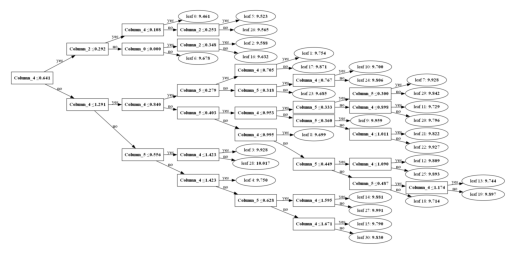

In [ ]:
import graphviz
from lightgbm import plot_tree

# ツリーのインデックスを指定
tree_index = 0

# ツリーを可視化
dot_data = plot_tree(model, tree_index=tree_index)
graph = graphviz.Source(dot_data)
graph.render(filename='tree_visualization', format='png', cleanup=True, directory='./')  

In [ ]:
submission.to_csv('submission_2.csv', index=False)

4/13<br>
稼働中のkaggleプレイグラウンド:アワビの年齢当て挑戦開始。<br>
やったことのある重回帰分析にてとりあえず提出してみる。<br>
マイナスが含まれるため平均二乗対数誤差が使用できませんとエラーがでる。<br>
そもそも平均二乗対数誤差て。重回帰じゃないということか？<br>
↓<br>
4/15<br>
予測モデルの学習を手筋に倣って初手LGBM。FirstEntry成功。872/1450位<br>
↓<br>
4/20<br>
Code参考にしてパラメータ写経。602/1845位